In [1]:
import pythreejs as p3
import numpy as np

In [2]:
N = 101
M = 51
xx = np.arange(N, dtype=np.float32)
yy = np.arange(M, dtype=np.float32)
x, y = np.meshgrid(xx[:-1], yy[:-1],indexing="ij")
# y, x = np.meshgrid(yy, xx)
b = N/20.0
c = M/2.0
r = np.sqrt(((x-c)/b)**2 + (y/b)**2)
a = np.sin(r)

In [3]:
v_xy = np.meshgrid(xx, yy, indexing="ij")
v_xy

[array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  1.,   1.,   1., ...,   1.,   1.,   1.],
        [  2.,   2.,   2., ...,   2.,   2.,   2.],
        ...,
        [ 98.,  98.,  98., ...,  98.,  98.,  98.],
        [ 99.,  99.,  99., ...,  99.,  99.,  99.],
        [100., 100., 100., ..., 100., 100., 100.]], dtype=float32),
 array([[ 0.,  1.,  2., ..., 48., 49., 50.],
        [ 0.,  1.,  2., ..., 48., 49., 50.],
        [ 0.,  1.,  2., ..., 48., 49., 50.],
        ...,
        [ 0.,  1.,  2., ..., 48., 49., 50.],
        [ 0.,  1.,  2., ..., 48., 49., 50.],
        [ 0.,  1.,  2., ..., 48., 49., 50.]], dtype=float32)]

In [4]:
vertices = np.asarray([
    [0, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [1, 1, 0],
    [1, 0, 0],
    [1, 1, 0],
    [2, 0, 0],
    [2, 1, 0],
], dtype='float32')

faces = np.asarray([
    [0, 2, 1],
    [2, 3, 1],
    [4, 6, 5],
    [6, 7, 5],
], dtype='uint16').ravel()  # We need to flatten index array


vertexcolors = np.asarray([(0,0,1), (0,0,1), (0,0,1), (0,0,1),
                           (1,0,0), (1,0,0), (1,0,0), (1,0,0)], dtype='float32')

cubeGeometry = p3.BufferGeometry(attributes=dict(
    position=p3.BufferAttribute(vertices, normalized=False),
    index=p3.BufferAttribute(faces, normalized=False),
    color=p3.BufferAttribute(vertexcolors),
))

mesh = p3.Mesh(
    geometry=cubeGeometry,
    material=p3.MeshBasicMaterial(vertexColors='VertexColors'),
    position=[-0.5, -0.5, -0.5]   # Center the cube
)


# cCube = p3.PerspectiveCamera(
#     position=[3, 3, 3], fov=20,
#     children=[DirectionalLight(color='#ffffff', position=[-3, 5, 1], intensity=0.5)])
# sceneCube = p3.Scene(children=[myobjectCube, cCube, AmbientLight(color='#dddddd')])

# rendererCube = p3.Renderer(camera=cCube, background='black', background_opacity=1,
#                         scene = sceneCube, controls=[OrbitControls(controlling=cCube)])

# rendererCube


view_width = 600
view_height = 400
camera = p3.PerspectiveCamera(position=[0, 0, 2], aspect=view_width/view_height)
# key_light = p3.DirectionalLight(position=[0, 10, 10])
# ambient_light = p3.AmbientLight()
scene = p3.Scene(children=[mesh, camera], background="#000000")
controller = p3.OrbitControls(controlling=camera)
renderer = p3.Renderer(camera=camera, scene=scene, controls=[controller],
                    width=view_width, height=view_height)
renderer

Renderer(camera=PerspectiveCamera(aspect=1.5, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale…

In [5]:
x = [0, 1, 2, 3]
y = [6, 7, 8, 9]
xg, yg = np.meshgrid(x, y, indexing="xy")

In [6]:
xg

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

In [7]:
yg

array([[6, 6, 6, 6],
       [7, 7, 7, 7],
       [8, 8, 8, 8],
       [9, 9, 9, 9]])

In [8]:
from scipy.spatial import Delaunay

x = [0, 1, 2]
y = [0, 1]
xg, yg = np.meshgrid(x, y)
xg = xg.flatten()
yg = yg.flatten()
points = np.array([xg, yg]).T

In [9]:
tri = Delaunay(points)
ntetra = np.shape(tri.simplices)[0]
nverts = ntetra*4

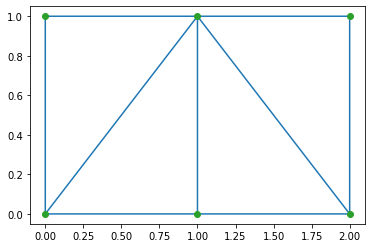

In [10]:
import matplotlib.pyplot as plt
plt.triplot(points[:,0], points[:,1], tri.simplices.copy())
plt.plot(points[:,0], points[:,1], 'o')
plt.show()

In [11]:
ntetra

4

In [12]:
xg[tri.simplices]

array([[1, 1, 0],
       [1, 0, 0],
       [2, 1, 2],
       [1, 1, 2]])

In [13]:
vertices = np.array(points, dtype='float32')
faces = np.array(tri.simplices, dtype='uint16').ravel()

# faces = np.asarray([
#     [0, 2, 1],
#     [2, 3, 1],
#     [4, 6, 5],
#     [6, 7, 5],
# ], dtype='uint16').ravel()  # We need to flatten index array
faces

array([1, 4, 0, 4, 3, 0, 5, 4, 2, 4, 1, 2], dtype=uint16)

In [16]:
# vertexcolors = np.repeat(np.asarray([(0,0,1), (0,0,1),
#                            (1,0,0), (1,0,0)], dtype='float32'), 3, axis=0)
vertexcolors = np.asarray([(0,0,1), (0,0,1),
                           (1,0,0), (1,0,0)], dtype='float32')

cubeGeometry = p3.BufferGeometry(attributes=dict(
    position=p3.BufferAttribute(vertices, normalized=False),
    index=p3.BufferAttribute(faces, normalized=False),
    color=p3.BufferAttribute(vertexcolors),
))

mesh = p3.Mesh(
    geometry=cubeGeometry,
#     material=p3.MeshBasicMaterial(vertexColors='VertexColors'),
    material=p3.MeshBasicMaterial(vertexColors='FaceColors'),
    position=[-0.5, -0.5, -0.5]   # Center the cube
)


# cCube = p3.PerspectiveCamera(
#     position=[3, 3, 3], fov=20,
#     children=[DirectionalLight(color='#ffffff', position=[-3, 5, 1], intensity=0.5)])
# sceneCube = p3.Scene(children=[myobjectCube, cCube, AmbientLight(color='#dddddd')])

# rendererCube = p3.Renderer(camera=cCube, background='black', background_opacity=1,
#                         scene = sceneCube, controls=[OrbitControls(controlling=cCube)])

# rendererCube


view_width = 600
view_height = 400
camera = p3.PerspectiveCamera(position=[0, 0, 2], aspect=view_width/view_height)
# key_light = p3.DirectionalLight(position=[0, 10, 10])
# ambient_light = p3.AmbientLight()
scene = p3.Scene(children=[mesh, camera], background="#000000")
controller = p3.OrbitControls(controlling=camera)
renderer = p3.Renderer(camera=camera, scene=scene, controls=[controller],
                    width=view_width, height=view_height)
renderer

Renderer(camera=PerspectiveCamera(aspect=1.5, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale…

In [53]:
points

array([[0, 0],
       [1, 0],
       [2, 0],
       [0, 1],
       [1, 1],
       [2, 1]])